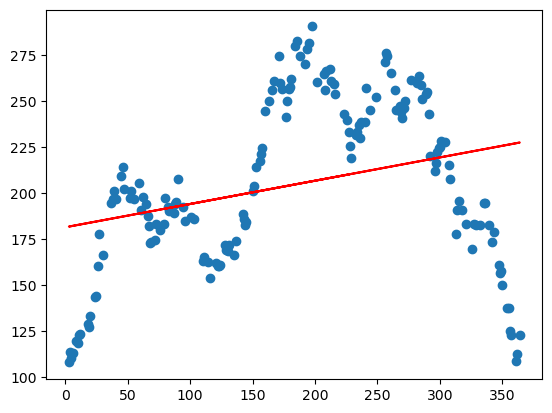

Training data using linear regression. MSE = 1925.2294901880832


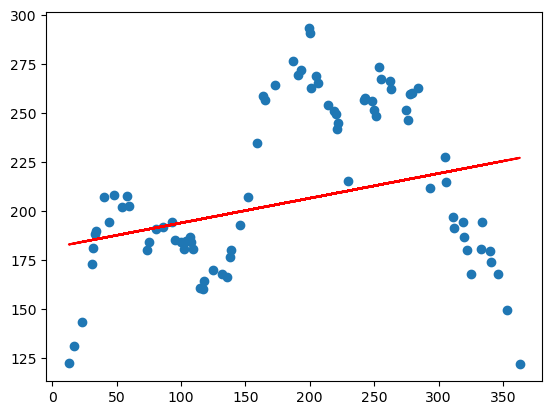

Test data using linear regression. MSE = 1681.591377812355


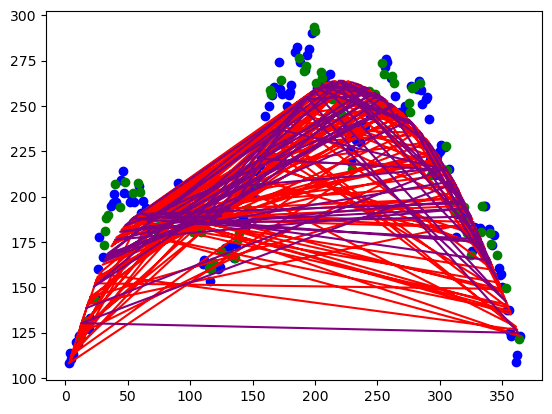

Training data using support vector regression. MSE = 295.21221476283574
Test data using support vector regression. MSE = 288.91105452400905


In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

df = pd.read_csv("TSLA.csv", sep=",")

#I have decided to use a regression algorithm for the Stock Price prediction, 
#because prior events do have an influence on the current.

# Convert the 'Date' column from string to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert from datetime to numeric val.
df['DayOfYear'] = df['Date'].dt.dayofyear

# Extracts the numeric date from the dataset.
X = df[['DayOfYear']] 
y = df[['Close']]

# Splits the data into a training set and a test set where the training has 2/3 of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

linear_regressor = LinearRegression()  # Creates a linear regression object.
linear_regressor.fit(X_train, y_train)  # Performs the actual linear regression.
Y_pred = linear_regressor.predict(X_train)  # Makes predictions.

# Predictions with the training set. Has a MSE of 1925.2294901880832.
plt.scatter(X_train, y_train)
plt.plot(X_train, Y_pred, color='red')
plt.show()
print("Training data using linear regression. MSE = "+str(metrics.mean_squared_error(y_train,Y_pred)))

# Predictions with the test set. Has a MSE of 1681.591377812355.
Y_pred = linear_regressor.predict(X_test)  # Predict the model on X_test
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print("Test data using linear regression. MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

#Both the sets are predicting what it thinks the closing value will be at that given day of the time period,
#and as we can see both are showing terrible predictions.
#Further down I have another algorithms which gets a MSE of about 200-300.

# Load the TSLA stock data
df = pd.read_csv("TSLA.csv", sep=",")

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract day of the year as a numerical feature
df['DayOfYear'] = df['Date'].dt.dayofyear

# Extract DayOfYear and Close from the dataset
X = df[['DayOfYear']].values  # 'DayOfYear' is the name of the column
y = df[['Close']].values  # 'Close' is the name of the column

# Split the set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create and train the SVR model
svr_regressor = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_regressor.fit(X_train, y_train.ravel())

# Make predictions
y_pred_train = svr_regressor.predict(X_train)
y_pred_test = svr_regressor.predict(X_test)

# Calculate R-squared (R2) for training and testing data
r2_train = svr_regressor.score(X_train, y_train)
r2_test = svr_regressor.score(X_test, y_test)

# Plot the results
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')
plt.plot(X_train, y_pred_train, color='red', label='SVR Predictions (Training)')
plt.plot(X_test, y_pred_test, color='purple', label='SVR Predictions (Testing)')
plt.show()

print("Training data using support vector regression. MSE = " + str(metrics.mean_squared_error(y_train, y_pred_train)))
print("Test data using support vector regression. MSE = " + str(metrics.mean_squared_error(y_test, y_pred_test)))

